A1 :
A1 : [[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]] 
C1 : [386 289 393 110 280 167 271 274 148 198]
Rank of Matrix A1: 3
Costs for each product A1: [ 1. 55. 18.]

A2 :
Model vector X:
[ 1. 55. 18.]

A3 :
The new customer is classified as: RICH

 A4 : 
the mean and variance of the Price data present in column D is 
 mean:  1560.663453815261 
 varince :58732.365352539186 
price data for all Wednesdays sample mean : 1550.706
price data for the month of April sample mean:1698.953
probability of making a loss over the stock : 0.498
 the probability of making a profit on Wednesday  0.084
 conditional probability of making profit, given that today is Wednesday 0.42
 scatter plot of Chg data against the day of the week


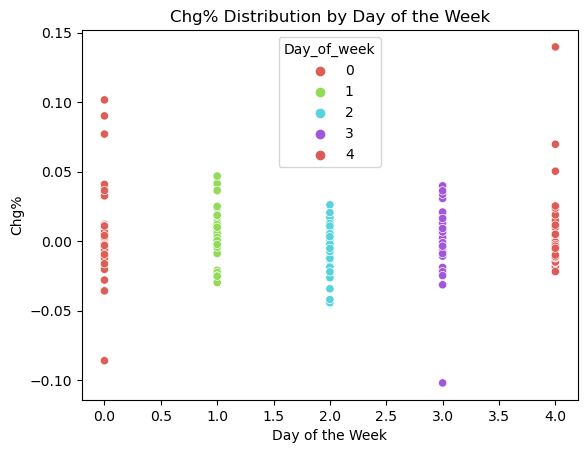

In [13]:
import statistics
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns


data_sheet1 = pd.read_excel("C:/Users/vishn/Downloads/Lab Session1 Data.xlsx", sheet_name='Purchase data')


# Function to split the dataframe into feature matrix A and target vector C
def matrix_split(df):
    A = df.iloc[:, 1:4].values
    C = df.iloc[:, 4].values
    return A, C

# Function to calculate the rank of matrix A
def Rank(A):
    rank = np.linalg.matrix_rank(A)
    return rank

# Function to calculate the cost vector using pseudo-inverse
def cost(A, C):
    A_pseudo_inverse = np.linalg.pinv(A)
    costs = np.dot(A_pseudo_inverse, C)
    return costs

# Function to calculate the model vector X
def calculate_model_vector(A, C):
    A_pseudo_inverse = np.linalg.pinv(A)
    X = np.dot(A_pseudo_inverse, C)
    return X

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to classify a new data point using k-nearest neighbors
def knn_classify(new_data_point, data, k=3):
    distances = []
    for index, row in data.iterrows():
        data_point = row[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
        distance = euclidean_distance(new_data_point, data_point)
        distances.append((distance, row['Class']))

    sorted_distances = sorted(distances, key=lambda x: x[0])
    neighbors = sorted_distances[:k]

    rich_count = sum(1 for _, label in neighbors if label == 'RICH')
    poor_count = sum(1 for _, label in neighbors if label == 'POOR')

    if rich_count > poor_count:
        return 'RICH'
    else:
        return 'POOR'
    

# A4
data_set = pd.read_excel("C:\\Users\\vishn\\Downloads\\Lab Session1 Data.xlsx",sheet_name="IRCTC Stock Price")
col_D = data_set.iloc[:,3]
def mean_M(Matrix):
    mean_stat = statistics.mean(Matrix)
    return mean_stat

def variance_V(Matrix):
    var_stat = statistics.variance(Matrix)
    return var_stat

def Wenesday_mean():
    # For wednesday mean calculation 
    data_set["Date"] = pd.to_datetime(data_set["Date"])
    data_set['weekday'] = data_set["Date"].dt.weekday
    wednesdays = data_set[data_set['weekday'] == 2]
    wednesdays_price = wednesdays['Price']
    wednesday_mean = wednesdays_price.mean()
    return wednesday_mean

def April_mean():
    data_set['Month'] = data_set["Date"].dt.month
    april_data = data_set[data_set["Month"]==4]
    April_mean = mean_M(april_data['Price'])
    return April_mean

def Stock_loss():
    is_loss = lambda x:x<0 
    loss_count = data_set['Chg%'].apply(is_loss).sum()
    total_count = len(data_set)
    probability_of_loss = loss_count/total_count
    return probability_of_loss

def profit_wed_prob():
#probability of making a profit on wednesdays 
    is_profit = lambda x:x>0
    profit_count = data_set[data_set['weekday'] == 2]['Chg%'].apply(is_profit).sum()
    probability_of_profit_wed = profit_count/len(data_set)
    return probability_of_profit_wed

def conditional_prob_wed():
    wednesdays = data_set[data_set['weekday'] == 2]
    profitable_wednesday = wednesdays[wednesdays['Chg%'] > 0]
    num_profitable_wednesdays = len(profitable_wednesday)
    total_wed = len(wednesdays)
    conditional_prob_wed = num_profitable_wednesdays/total_wed
    return conditional_prob_wed

def Scatter_plot():
    # scatter-plot of Chg% aganist the day of week
    data_set["Day_of_week"] = data_set['Date'].dt.weekday
    sns.scatterplot(x="Day_of_week", y="Chg%", data=data_set, hue="Day_of_week", palette="hls")
    plt.xlabel("Day of the Week")
    plt.ylabel("Chg%")
    plt.title("Chg% Distribution by Day of the Week")
    plt.show()


# Split the data into feature matrix A and target vector C
A1, C1 = matrix_split(data_sheet1)

# Calculate rank of matrix A1
rank_A1 = Rank(A1)

# Calculate cost vector
costs_A1 = cost(A1, C1)

# Calculate model vector X
model_vector_X = calculate_model_vector(A1, C1)

# Classify a new customer
payments_threshold = 200
data_sheet1['Class'] = np.where(data_sheet1['Payment (Rs)'] > payments_threshold, 'RICH', 'POOR')
new_customer_data = np.array([50, 30, 20])  
classification_result = knn_classify(new_customer_data, data_sheet1)

# Print results
print("A1 :")
print("A1 :", A1 ,'\nC1 :', C1)
print("Rank of Matrix A1:", rank_A1)
print("Costs for each product A1:", costs_A1)

print("\nA2 :")
print("Model vector X:")
print(model_vector_X)

print("\nA3 :")
print("The new customer is classified as:", classification_result)


print("\n A4 : ")

print(f"the mean and variance of the Price data present in column D is \n mean:  {mean_M(col_D)} \n varince :{variance_V(col_D)} ")
print(f"price data for all Wednesdays sample mean : {Wenesday_mean():.3f}")
print(f"price data for the month of April sample mean:{April_mean():.3f}")
print(f"probability of making a loss over the stock : {Stock_loss():.3f}")
print(f" the probability of making a profit on Wednesday  {profit_wed_prob():.3f}")
print(f" conditional probability of making profit, given that today is Wednesday {conditional_prob_wed()}")
print(" scatter plot of Chg data against the day of the week")
Scatter_plot()
